In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from google.colab import files
# files.upload()

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
train_df = pd.read_csv('/content/drive/My Drive/Datasets/train.csv')

#printing first five rows of the dataset for a brief preview
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
#getting list of attributes
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [0]:
#checking for null values
train_df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [0]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [0]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [0]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [0]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


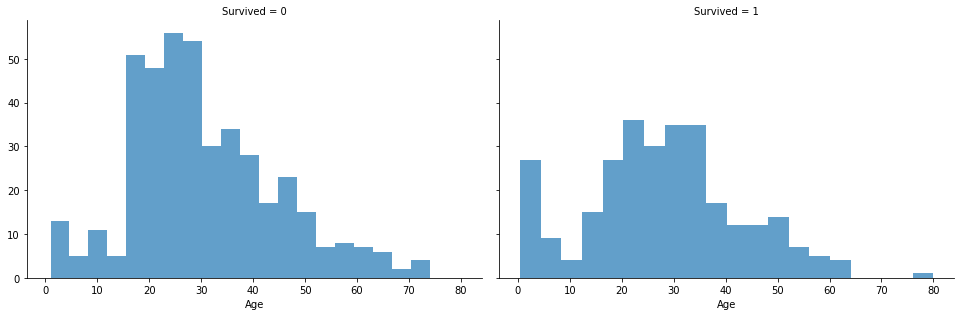

In [0]:
#plotting histogram grid of survivors based on age
grid1 = sns.FacetGrid(train_df, col='Survived', size=4.5, aspect=1.5)
grid1.map(plt.hist, 'Age', alpha = .7, bins=20)

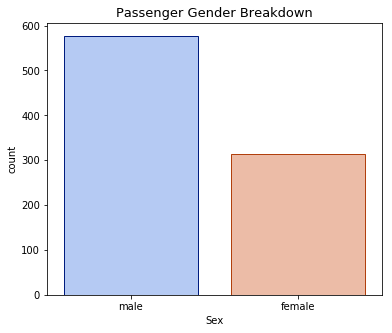

In [0]:
#plotting gender breakdown of all passengers
plt.subplots(figsize=(6,5))
sns.countplot(x='Sex', data = train_df, palette='coolwarm', edgecolor=sns.color_palette('dark'))
plt.title('Passenger Gender Breakdown', fontsize = 13)
plt.savefig('TitanicGender.png') #saving plot image
#files.download('TitanicGender.png')
plt.show()

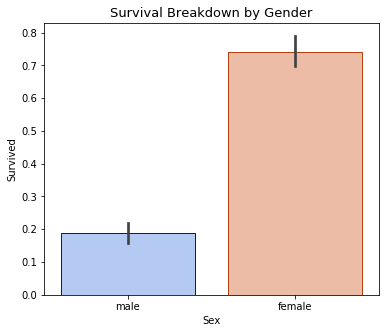

In [0]:
#plotting percentage of survivors based on gender
plt.subplots(figsize=(6,5))
sns.barplot(x='Sex', y='Survived', data=train_df, palette='coolwarm', edgecolor=sns.color_palette('dark'))
plt.title('Survival Breakdown by Gender', fontsize = 13)
plt.savefig('TitanicGenderSurvival.png') #saving plot image
#files.download('TitanicGenderSurvivalAge.png') #use this instead of plt.savfig to download image to local drive
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


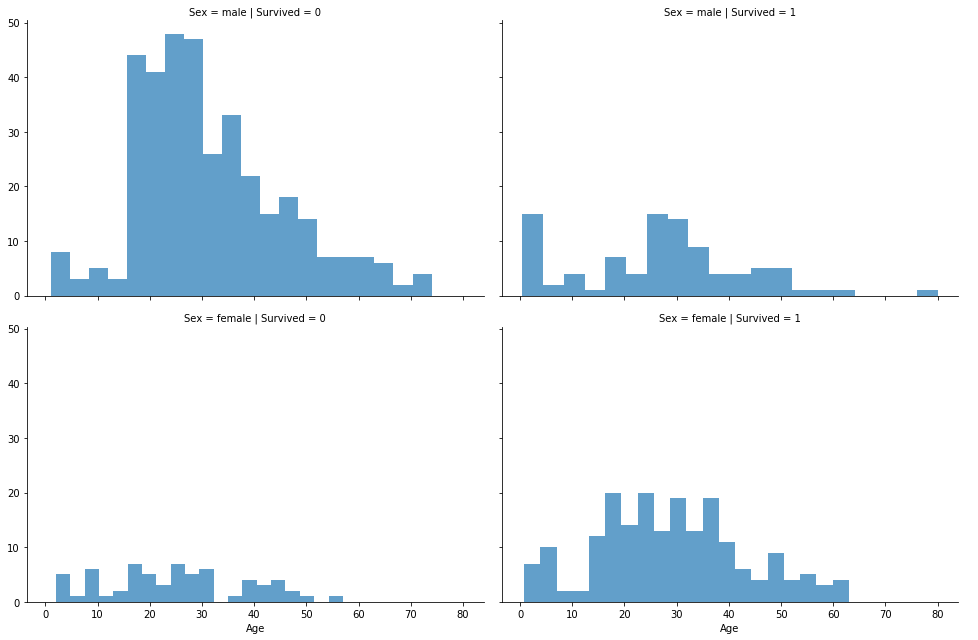

In [0]:
#plotting grid to compare survival data based on gender and age
grid = sns.FacetGrid(train_df, col='Survived', row='Sex', size=4.5, aspect=1.5)
grid.map(plt.hist, 'Age', alpha = .7, bins=20) #add alpha=.5 to lighten color of plot to light blue
plt.savefig('TitanicGenderSurvivalAge.png') #saving plot image
#files.download('TitanicGenderSurvivalAge.png')
grid.add_legend();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


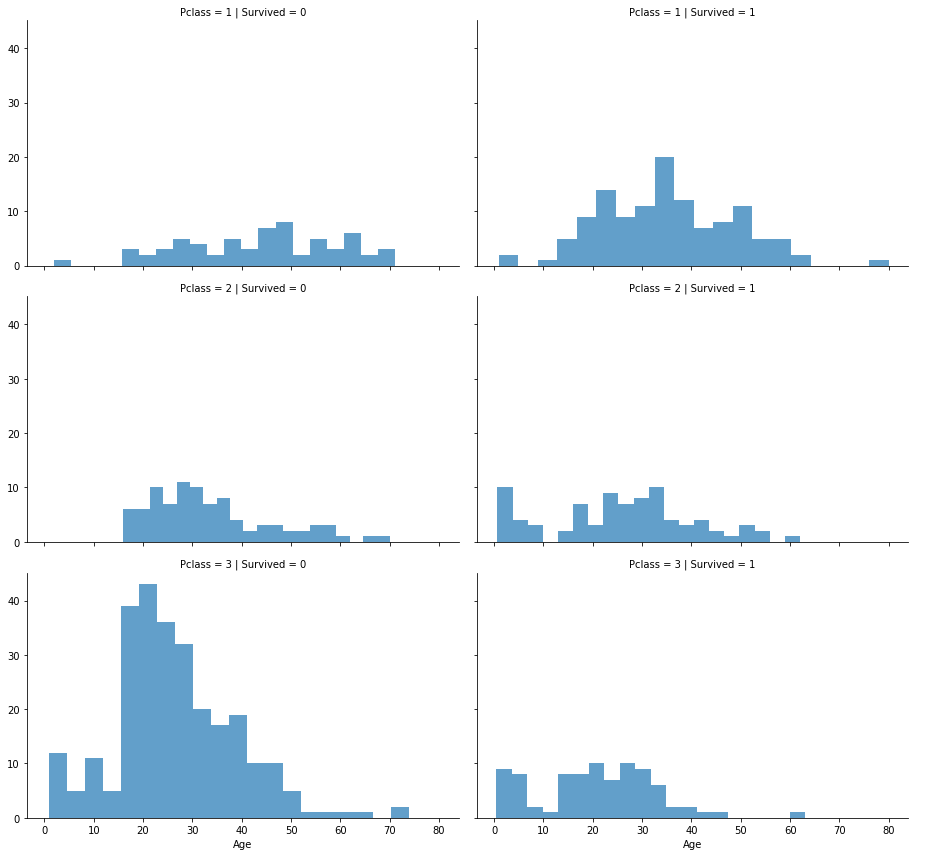

In [0]:
#plotting grid to compare survival data based on Pclass and age
grid2 = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=4, aspect=1.6)
grid2.map(plt.hist, 'Age', alpha=.7, bins=20)
plt.savefig('TitanicPclassSurvivalAge.png') #saving plot image
#files.download('TitanicPclassSurvivalAge.png')
grid2.add_legend();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


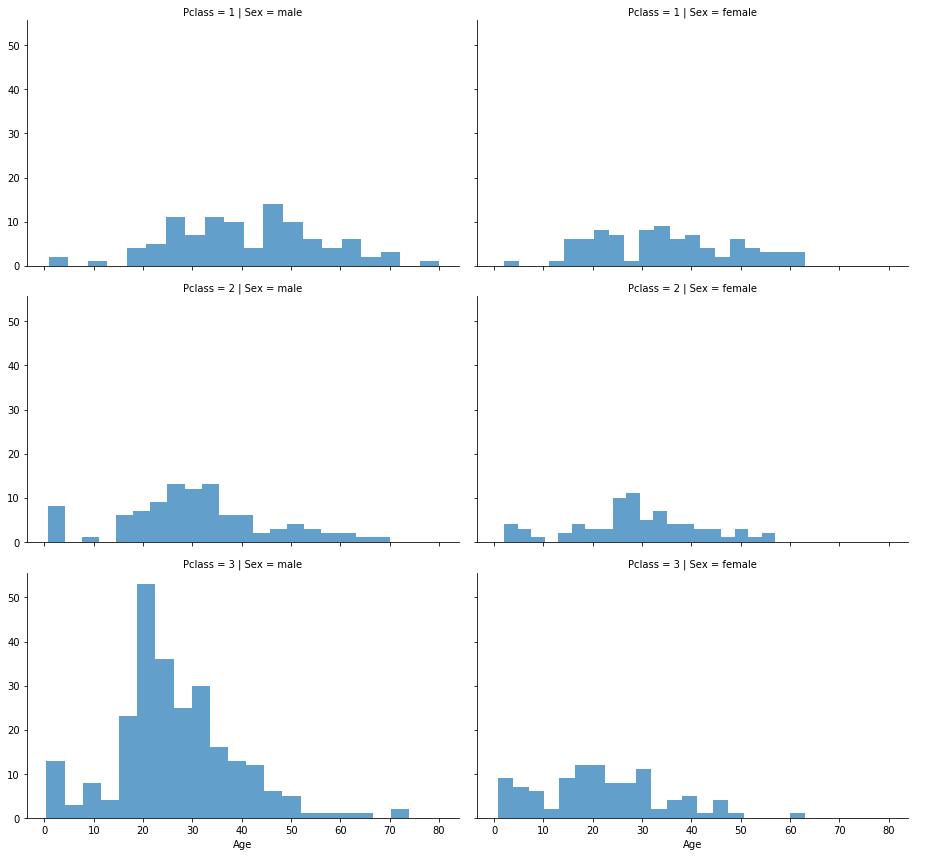

In [0]:
#plotting grid to compare Pclass and gender based on age
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=4, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.7, bins=20)
grid.add_legend()